<a href="https://colab.research.google.com/github/hida0/ESAA/blob/HW/Week13_HW2_%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 개념 정리 & 필사
(파이썬 머신러닝 완벽가이드  ch6. 1-5 pg. 377-407)


### 1. 차원 축소
- 차원 축소는 매우 많은 피처로 구성된 **다차원 데이터 세트의 차원을 축소**하여 **새로운 차원의 데이터 세트를 생성**하는 것이다. 
- 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어진다.
- 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능성이 크며, 선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하된다.
- 매우 많은 다차원의 피처를 차원 축소하여 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다. 3차원 이하의 차원 축소를 통해서 시각적으로 데이터를 압축하여 표현할 수 있다.
- 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있다.
- 일반적으로 차원 축소는 **피처 선택**(feature selection)과 **피처 추출**(feature extraction)로 나눌 수 있다.
> #### 1. 피처 선택(feature selection)
 - 피처 선택, 즉 특성 선택은 말 그대로 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 **데이터의 특징을 잘 나타내는 주요 피처만 선택**하는 것이다.

 > #### 2. 피처 추출(feature extraction)
 - 피처 추출은 **기존 피처를 저차원의 중요 피처로 압축하여 추출**하는 것이다.
 - 이렇게 새롭게 추출된 중요 특성은 기존 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 된다.
 - 기존 피처를 단순히 압축하는 것이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑하여 추출하는 것이다.

- 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아니라, 더 중요한 의미는 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 잇는 잠재적인 요소를 추출하는 데에 있다.
- 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘으로 PCA, SVD, NMF가 있다.

### 2. **PCA**(Principal Component Analysis)
- **PCA**는 **가장 대표적인 차원 축소 기법**으로, 여러 변수 간에 존재하는 상관관계를 이용해 이를 **대표하는 주성분을 추출하여 차원을 축소**하는 기법이다.
- PCA로 차원을 축소할 때는 기존 데이터의 **정보 유실이 최소화**되는 것이 당연하며, 이를 위해서 **가장 높은 분산을 가지는 데이터의 축**을 찾아서 이 축으로 차원을 축소하며 이것이 PCA의 주성분이 된다.
- PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫번째 벡터 축을 생성하고, 두번째 축은 이 벡터 축에 직각이 되는 벡터를 축으로 한다. 세번째 축은 다시 두번째 축과 직각이 되는 벡터를 생성하는 방식으로 축을 생성한다.
- 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소된다.
- 주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 **원본 데이터의 총 변동성을 대부분 설명**할 수 있는 분석법이다.

---

- PCA를 선형대수 관점에서 해석해보면 **입력 데이터의 공분산 행렬을 고유값 분해**하고, 이렇게 구한 **고유벡터에 입력 데이터를 선형 변환**하는 것이다.
- 이 **고유벡터**가 PCA의 **주성분 벡터**로서, **입력 데이터의 분산이 큰 방향**을 나타낸다.
- **고유값**은 바로 이 **고유벡터의 크기**를 나타내며, 동시에 **입력 데이터의 분산**을 나타낸다.
- 즉 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용하여 입력 데이터를 선형 변환하는 방식이 PCA이다.
- 보통 PCA는 다음과 같은 스텝으로 수행된다.
 1. 입력 데이터 세트의 공분산 행렬을 생성한다.
 2. 공분산 행렬의 고유벡터와 고유값을 계산한다.
 3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터를 추출한다.
 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.


### 2-1. PCA - 붓꽃 데이터 세트 실습
- 붓꽃 데이터 세트는 sepal length, sepal width, petal length, petal width의 4개의 속성으로 되어 있다.
- 이 4개의 속성을 2개의 PCA 차원으로 압축하여 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인한다.
- 사이킷런의 붓꽃 데이터를 로드하여 DataFrame으로 변환한다.
- 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포되어 있는지 2차원으로 시각화한다. 
- 두 개의 속성인 sepal length와 sepal width를 X축, Y축으로 하여 품종 데이터의 분포를 나타낸다.
- Setosa 품종의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포되어 있으며, Versicolor와 Virginica의 경우 두 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있다.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


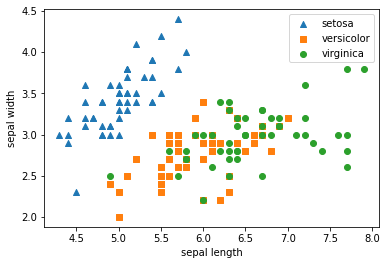

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은  0, versicolor의 target 값은 1, virginica의 target 값은 2
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    # 각 target 별로 다른 모양의 산점도로 표시
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### 2-1. PCA - 붓꽃 데이터 세트 실습
- PCA로 4개 속성을 2개로 압축한 뒤 이와 비슷하게 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화한다.
- 붓꽃 데이터 세트에 바로 PCA를 적용하기 전에 먼저 개별 속성을 함께 스케일링 해야 한다.
- PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받기 때문에, 여러 속성을 PCA로 압축하기 전에 **각 속성값을 동일한 스케일로 변환하는 것이 필요**하다.
- 사이킷런의 **`StandardScaler( )`**를 이용하여 평균이 0, 분산이 1인 표준 정규 분포로 iris 데이터 세트의 속성값들을 변환한다.
---
- 스케일링이 적용된 데이터 세트에 PCA를 적용하여 4차원의 붓꽃 데이터를 2차원 데이터로 변환한다.
- 사이킷런은 PCA 변환을 위해 **`decomposition`**의 **`PCA`** 클래스를 제공한다. **`PCA`** 클래스는 생성 파라미터로 **`n_components`**를 입력 받으며 PCA로 변환할 차원의 수를 의미한다. 2차원으로 변환할 것이므로 2로 설정한다.
- `fit(입력 데이터 세트)` 메서드와 `transform(입력 데이터 세트)` 메서드를 호출하여 PCA로 변환을 수행한다. **`transform`** 메서드는 **원본 데이터 세트를 변환한 객체 변수를 넘파이로 반환**한다.
- PCA 변환한 iris_pca는 변환된 데이터 세트를 150x2 넘파이 행렬로 가지고 있으며, 데이터 값의 확인을 위해 이를 DataFrame으로 변환한다.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
from sklearn.decomposition import PCA

# 2개의 주성분을 선택
pca = PCA(n_components=2)

# fit()과 transform()을 호출하여 PCA 변환한 넘파이를 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명하여 DataFrame을 생성
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


### 2-1. PCA - 붓꽃 데이터 세트 실습
- 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화한다. pca_component_1 속성을 X축으로, pca_component_2 속성을 Y축으로 하여 붓꽃 품종이 어떻게 분포되는지 확인한다.
- PCA로 변환한 후에도 pca_component_1 축을 기반으로 Setosa 품종을 명확하게 구분할 수 있으며, Versicolor와 Virginica는 서로 겹치는 부분이 일부 존재하지만 비교적 잘 구분된다.
- 이는 PCA의 첫번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문이다.
---
- PCA component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 확인한다.
- PCA 변환을 수행한 PCA 객체의 **`explained_variance_ratio_`** 속성은 **전체 변동성에서 개별 PCA component별로 차지하는 변동성의 비율을 제공**한다.
- 첫번째 주성분인 pca_component_1이 전체 변동성의 약 72.9%를 차지하며, 두번째 주성분인 pca_component_2가 약 22.8%를 차지한다. 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다.

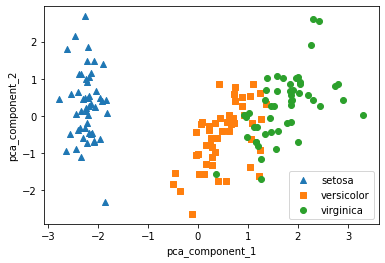

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot을 그림
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
# 개별 PCA component별 전체 변동성 중 차지하는 비율
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

### 2-1. PCA - 붓꽃 데이터 세트 실습
- 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 비교한다.
- Estimator로 **`RandomForestClassifier`**를 이용하고, **`cross_val_score( )`**를 이용하여 3개의 교차 검증 세트로 정확도 결과를 비교한다.
---
- 원본 데이터 세트의 예측 정확도는 0.96이고, PCA 변환 데이터 세트의 예측 정확도는 0.88이다. 
- 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없다. 
- 약 10% 정도의 정확도 하락은 비교적 큰 성능 수치의 감소지만, 속성의 개수가 4개에서 2개로 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있다.

In [ ]:
# 원본 붓꽃 데이터 세트에 랜덤 포레스트를 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print("원본 데이터 교차 검증 개별 정확도: ", scores)
print("원본 데이터 평균 정확도: ", np.mean(scores))

원본 데이터 교차 검증 개별 정확도:  [0.98 0.94 0.96]
원본 데이터 평균 정확도:  0.96


In [ ]:
# 2차원 PCA 변환된 데이터 세트에 랜덤 포레스트 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print("PCA 변환 데이터 교차 검증 개별 정확도: ", scores_pca)
print("PCA 변환 데이터 평균 정확도: ", np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도:  [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도:  0.88


### 2-2. PCA - 신용카드 데이터 세트 실습
- 신용카드 데이터 세트는 30000개의 레코드와 24개의 속성을 가지고 있다. 이 중 'default payment next month' 속성이 Target 값으로 "다음달 연체 여부"를 의미하며, "연체"'일 경우 1, "정상납부"일 경우 0이다.
- 원본 데이터 세트에 **`rename`**을 이용하여 PAY_0 다음에 PAY_2이므로 PAY_0을 PAY_1로 변경한다. 또 'default payment next month' 칼럼의 칼럼명이 매우 기므로 'default'로 칼럼명을 변경한다.
- Target 속성인 'default' 칼럼을 y_target 변수로 별도 저장하고, 피처 데이터는 default 칼럼을 제외한 별도의 DataFrame으로 생성한다.
---
- 신용카드 데이터 세트의 23개의 속성은 각 속성끼리 상관도가 매우 높다.
- DataFrame의 **`corr( )`**를 이용하여 각 속성 간의 상관도를 구한 뒤, 이를 Seaborn의 **`heatmap`**으로 시각화한다.

In [ ]:
import pandas as pd

# header로 의미없는 첫 행을 제거, iloc로 기존 id를 제거
df = pd.read_csv("/content/drive/MyDrive/ESAA/data/credit_card.csv", header=1).iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
# PAY_0을 PAY_1로, default payment next month을 default로 변경
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)

y_target = df['default']
X_features = df.drop('default', axis=1)

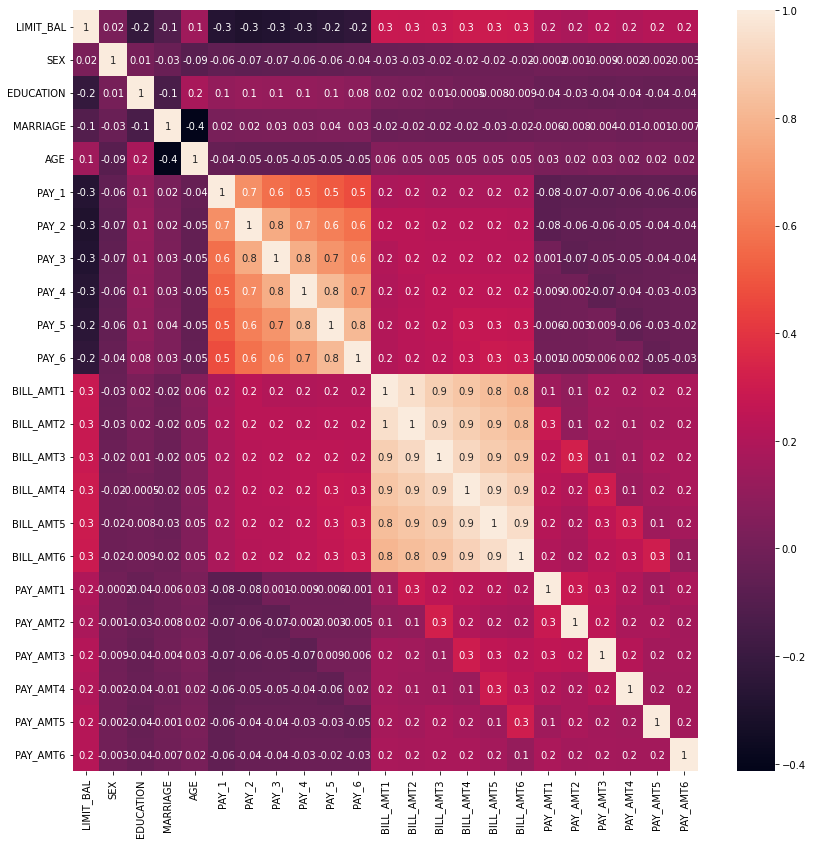

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

### 2-2. PCA - 신용카드 데이터 세트 실습
- BILL_AMT1-BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높다는 것을 알 수 있다. PAY_1-PAY_6까지의 속성 역시 상관도가 높다.
- 이렇게 높은 상관도를 가진 속성들은 소수의 주성분만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있다.
- BILL_AMT1~BILL_AMT6까지 6개 속성을 2개의 주성분으로 PCA 변환한 뒤, 개별 주성분의 변동성을 **`explained_variance_ratio_`** 속성으로 확인한다.
- 단 2개의 주성분만으로도 6개 속성의 변동성을 걍 95% 이상 설명할 수 있으며, 특히 첫번째 주성분 축으로 90%의 변동성을 수용할 정도로 해당 6개 속성의 상관도가 매우 높다.

In [ ]:
from sklearn.decomposition import PCA

# BILL_AMT1~BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print("대상 속성명: ", cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체를 생성 
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)

# 각 주성분의 변동성 비율 확인하기 위해 fit( )을 호출하여 explained_variance_ratio_를 이용
pca.fit(df_cols_scaled)
print("PCA Component별 변동성: ", pca.explained_variance_ratio_)

대상 속성명:  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성:  [0.90555253 0.0509867 ]


### 2-2. PCA - 신용카드 데이터 세트 실습
- 원본 데이터 세트와 6개의 주성분으로 PCA 변환한 데이터 세트의 분류 예측 결과를 비교한다.
- 원본 데이터 세트에 랜덤 포레스트를 이용하여 타겟값이 디폴트값을 3개의 교차 검증 세트로 분류 예측한다.
- 3개의 교차 검증 세트에서 평균 예측 정확도는 약 81.7%를 나타낸다.
- 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대하여 동일하게 분류 예측을 수행한다.
- PCA 변환 데이터의 평균 예측 정확도는 약 79.6%이다.
---
- 전체 23개 속성의 약 1/4 수준인 6개 주성분만으로도 원본 데이터를 기반으로 한 분류 예측의 결과보다 약 1~2% 정도의 예측 성능 저하만 발생하였다.
- 전체 속성의 1/4 정도만으로도 이정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것이다.

In [ ]:
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print("CV=3인 경우의 개별 Fold 세트별 정확도: ", scores)
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도:  [0.8083 0.8196 0.8232]
평균 정확도: 0.8170


In [ ]:
# 원본 데이터 세트를 먼저 동일한 스케일로 변환
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 주성분을 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측을 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print("CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: ", scores_pca)
print("PCA 변환 데이터 세트의 평균 정확도: {0:.4f}".format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:  [0.79   0.7959 0.8023]
PCA 변환 데이터 세트의 평균 정확도: 0.7961


### 3. **LDA**(Linear Discriminant Analysis)
- **LDA**는 **선형 판별 분석법**이다.
- PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영하여 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 **분류에서 사**용하기 쉽도록 **개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소**한다.
- PCA는 입력 데이터의 변동성이 가장 큰 축을 찾았지만, LDA는 입력 데이터의 **결정값 클래스를 최대한으로 분리할 수 있는 축**을 찾는다.
- LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소한다. 즉, **클래스간 분산은 최대한 크게** 가져가고, **클래스 내부의 분산은 최대한 작게** 가져가는 방식이다.
- 일반적으로 LDA를 구하는 스텝은 PCA와 유사하나, 가장 큰 차이점은 공분산 행렬이 아니라 **클래스간 분산과 클래스 내부 분산 행렬**을 생성한 뒤 **이 행렬에 기반하여 고유벡터**를 구하고 **입력 데이터를 투영**한다는 것이다.
- LDA를 구하는 스텝은 다음과 같다.
 1. 클래스 내부와 클래스간 분산 행렬을 구한다. 이 두개의 행렬은 입력 데이터의 결정값 클래스별로 개별 피처의 평균 벡터를 기반으로 구한다.
 2. 클래스 내부 분산 행렬을 $S_w$, 클래스간 분산 행렬을 $S_B$라고 하면, $S_W^T S_B$ 식으로 두 행렬을 고유벡터로 분해할 수 있다.
 3. 고유값이 가장 큰 순서로 K개(LDA 변환차수)만큼 추출한다.
 4. 고유값이 가장 큰 순서로 추출된 고유벡터를 이용하여 새롭게 입력 데이터를 변환한다.

### 3. LDA - 붓꽃 데이터 세트 실습
- 붓꽃 데이터 세트를 사이킷런의 LDA를 이용하여 변환하고, 그 결과를 품종별로 시각화한다.
- 먼저 붓꽃 데이터 세트를 로드하고 표준 정규 분포로 스케일링한다.
- LDA를 사이킷런의 **`discriminant_analysis`**로부터 **`LinearDiscriminantAnalysis`** 클래스를 로드하여 이용한다.
- 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환한다. **`n_components`** 파라미터에 변환할 개수를 지정한다.
- PCA와 다르게 유의해야할 점은 실제로는 **LDA가 지도학습**이라는 것으로, 즉 **클래스의 결정값이 변환 시에 필요**하다. 따라서 **`lda`** 객체의 **`fit( )`** 메서드를 호출할 때 결정값을 입력해야 한다.
- LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현한다.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # 클래스의 결정값 입력
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


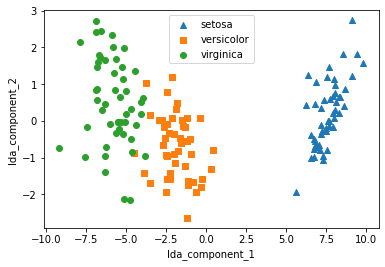

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2로 각 target별로 다른 모양의 산점도로 표시
for i, marker in enumerate(markers):
     x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
     y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
     plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### 4. **SVD**(Singular Value Decomposition)
- SVD는 **특이값 분해**라고 불린다.
- PCA와 유사한 행렬 분해 기법을 이용하는데 PCA가 정방행렬만을 고유벡터로 분해할 수 있는 반면, **SVD는 정방행렬 뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용**할 수 있다. 
- 일반적으로 SVD는 m x n 크기의 행렬 $A$를 다음과 같이 분해하는 것을 의미한다.
$ A = U∑V^T $
- 행렬 $U$와 $V$에 속한 벡터는 **특이벡터**(singular vector)이며, 모든 특이벡터는 **서로 직교**하는 성질을 가진다. $∑$은 **대각행렬**로 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다.
- SVD는 $A$의 차원이 m x n 일 때 $U$의 차원이 m x m, $∑$의 차원이 m x n, $V^T$의 차원이 n x n 으로 분해한다.
--- 
- 하지만 일반적으로는 다음과 같이 $∑$의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고, 제거된 $∑$에 대응되는 $U$와 $V$ 원소도 함께 제거하여 차원을 줄인 형태로 SVD를 적용한다.
- 이렇게 컴팩트한 형태로 SVD를 적용하면 $A$의 차원이 m x n 일 때 $U$의 차원이 m x p, $∑$의 차원이 p x p, $V^T$의 차원이 p x n 으로 분해한다.
- **Truncated SVD**는 $∑$의 대각원소 중에 상위 몇 개만 추출하여 여기에 대응하는 $U$와 $V$의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것이다. 

### 4-1. SVD 실습
- SVD는 넘파이의 SVD 모듈인 **`numpy.linalg.svd`**를 로드하여 사용한다.
- 랜덤한 4 x 4 넘파이 행렬 a를 생성한다. 행렬의 개별 로우끼리의 의존성을 없애기 위해 랜덤 행렬을 생성하는 것이다.
- 이렇게 생성된 a 행렬에 SVD를 적용하여 $U, ∑, V^T$를 도출한다.
- SVD 분해는 **`numpy.linalg.svd`**에 **파라미터로 원본 행렬을 입력**하면, **$U$ 행렬, $∑$ 행렬, $V^T$ 행렬을 반환**한다.
- 이때 $∑$ 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고 그렇지 않은 경우는 모두 0이므로, **0이 아닌 값의 경우만 1차원 행렬로 반환**한다.
---
- 분해된 이 $U, \sum, V^T$를 이용하여 다시 원본 행렬로 정확히 복원되는지 확인하기 위해 이 $U, \sum, V^T$를 내적한다. 
- 한가지 유의할 점은 $∑$의 경우 0이 아닌 값만 1차원으로 추출하였으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 한다. 이를 위해 **`np.diag`**를 이용한다.
- 세 행렬을 내적한 결과 원본 행렬 a와 동일하게 복원됨을 알 수 있다.

In [ ]:
# 넘파이의 svd 모듈 임포트
import numpy as pd
from numpy.linalg import svd

# 4x4 랜덤 행렬 a를 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
# svd를 이용하여 3가지 행렬을 반환
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print("U matrix: \n", np.round(U, 3))
print("Sigma Value: \n", np.round(Sigma, 3))
print("V transpose matrix: \n", np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix: 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value: 
 [3.423 2.023 0.463 0.079]
V transpose matrix: 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [ ]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


### 4-1. SVD 실습
- 이번에는 **데이터 세트가 로우 간에 의존성**이 있을 경우 어떻게 $∑$ 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아본다.
- 일부러 로우 간에 의존성을 부여하기 위해 a 행렬의 3번째 로우를 '1번째 로우 + 2번째 로우'로 업데이트하고, 4번째 로우는 1번째 로우와 같다고 업데이트한다.
- 이제 로우 간의 관계가 매우 높아진 a 행렬을 다시 SVD로 분해한다.
- 이전과 차원은 같지만 $\sum$ 의 값 중 2개가 0으로 변했다. 
- 즉, **선형 독립인 로우 벡터의 개수**가 2개라는 의미이며, **행렬의 랭크(Rank)**가 2라는 의미이다.
---
- 이렇게 분해된 $U, \sum, V^T$를 이용해 다시 원본 행렬로 복원하는데, 이번에는 $U, \sum, V^T$의 전체 데이터를 이용하지 않고 **$∑$의 0에 대응되는 $U, \sum, V^T$의 데이터를 제외하고 복원**한다.
- 즉 $\sum$의 경우 앞의 2개 요소만 0이 아니므로, **$U$ 행렬 중 선형 두 개의 열**만 추출하고 **$V^T$ 행렬 중 선형 두 개의 행**만 추출하여 복원하는 것이다.

In [ ]:
# a 행렬을 업데이트
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
# 업데이트된 a 행렬을 svd를 이용하여 3가지 행렬을 반환
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)

# Sigma의 값을 확인
print("Sigma Value: \n", np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value: 
 [2.663 0.807 0.    0.   ]


In [ ]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]

print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하여 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


### 4-1. SVD 실습
- **Truncated SVD**를 이용하여 행렬을 분해한다.
- Truncated SVD는 **$∑$ 행렬에 있는 대각원소**, 즉** 특이값 중 상위 일부 데이터만 추출하여 분해**하는 방식이다.
- 이렇게 분해하면 인위적으로 더 작은 차원의 $U, \sum, V^T$로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 수는 없다.
- 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬에 근사할 수 있다.
---
- Truncated SVD는 넘파이가 아닌 사이파이에서만 지원된다. 일반적으로 사이파이의 SVD는 **`scipy.linalg.svd`**를 이용하면 되지만, Truncated SVD는 희소 행렬로만 지원되므로 **`scipy.sparse.linalg.svds`**를 이용해야 한다. 이를 이용하여 간단히 테스트한다.
- 임의의 원본 행렬 6x6을 Normal SVD로 분해하여 분해된 행렬의 차원과 $∑$ 행렬 내의 특이값을 확인한 뒤, 다시 Truncated SVD로 분해해 분해된 행렬의 차원, $Σ$ 행렬 내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본 데이터를 비교한다. 

In [ ]:
import numpy as pd
from scipy.linalg import svd
from scipy.sparse.linalg import svds

# 원본 행렬을 출력하고 SVD를 적용할 경우의 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print("원본 행렬: \n", matrix)

# svd를 이용하여 3가지 행렬을 반환
U, Sigma, Vt = svd(matrix, full_matrices=False)
print("\n분해 행렬 차원:", U.shape, Sigma.shape, Vt.shape)
print("\nSigma값 행렬:", Sigma)

원본 행렬: 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [ ]:
# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD를 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print("Truncated SVD 분해 행렬 차원:", U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print("\nTruncated SVD Sigma값 행렬:", Sigma_tr)

# 내적으로 원본 행렬 복원
Sigma_tr = np.diag(Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, Sigma_tr), Vt_tr)
print("\nTruncated SVD로 분해 후 복원 행렬:\n", matrix_tr)

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


### 4-2. SVD - 사이킷런 TruncatedSVD 클래스를 이용한 붓꽃 데이터 세트 변환
- 사이킷런의 Truncated SVD 분해는 **`decomposition`**으로부터 **`TruncatedSVD`** 클래스를 로드하여 이용하며, 사이파이의 **`svds`**와 같이 Truncated SVD 연산을 수행하여 원본 행렬을 분해한 $U, \sum, V^T$ 행렬을 반환하지는 않는다.
- 사이킷런 **`TruncatedSVD`** 클래스는 PCA 클래스와 유사하게 **`fit( )`**과 **`transform( )`**을 호출하여 **원본 데이터를 몇 개의 주요 컴포넌트로 차원 축소**하여 변환한다. 몇 개의 컴포넌트로 축소할 것인지는 **`n_components`** 파라미터에 지정한다.
- 원본 데이터를 Truncated SVD 방식으로 분해된 $U*∑$ 행렬에 선형 변환하여 생성한다.
- 붓꽃 데이터 세트를 **`TruncatedSVD`** 클래스를 이용하여 변환한다.

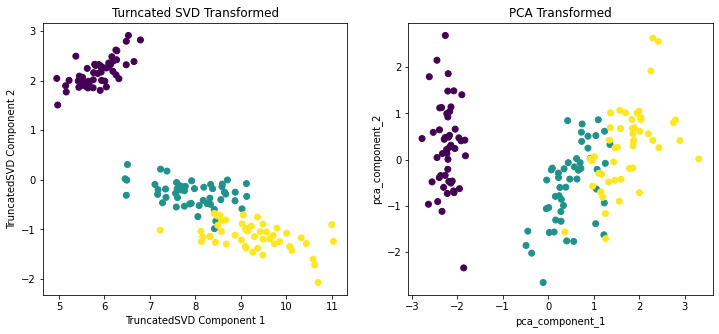

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# 산점도 2차원으로 TruncatedSVD 변환된 데이터를 표현하며 품종은 색깔로 구분
ax[0].scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax[0].set_xlabel("TruncatedSVD Component 1")
ax[0].set_ylabel("TruncatedSVD Component 2")
ax[0].set_title("Turncated SVD Transformed")

# PCA로 변환된 붓꽃 데이터 세트와 비교
ax[1].scatter(x=irisDF_pca['pca_component_1'], y=irisDF_pca['pca_component_2'], c=iris.target)
ax[1].set_xlabel('pca_component_1')
ax[1].set_ylabel('pca_component_2')
ax[1].set_title("PCA Transformed")
plt.show()

### 4-2. SVD - 사이킷런 TruncatedSVD 클래스를 이용한 붓꽃 데이터 세트 변환
- 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환을 하여 시각화하면 두 경우가 거의 동일함을 알 수 있다.
- 또한 두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율 값을 실제로 서로 비교해보면 거의 같음을 알 수 있다.
- 즉 데이터 세트가 스케일링으로 데이터의 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다.

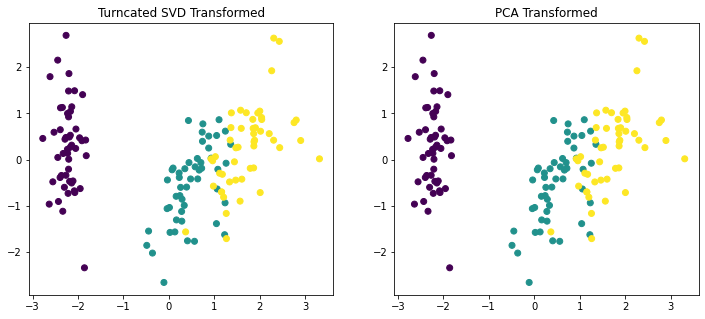

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, PCA

# 붓꽃 데이터를 StandardSacler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환을 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환을 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(12, 5), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax1.set_title("Turncated SVD Transformed")
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax2.set_title("PCA Transformed")
plt.show()

In [ ]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

-3.9685307484615735
0.14980502560478307


### 5. **NMF**(Non-Negative Matrix Factorization)
- NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형이다.
- 행렬 분해(Matrix Factorization)는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것이다. 
- 예를 들어 4x6 원본 행렬 $V$는 4x2 행렬 $W$와 2x6 행렬 $H$로 근사하여 분해될 수 있다. 이처럼 행렬 분해를 하게 되면 일반적으로 길고 가는 행렬 $W$와 작고 넓은 행렬 $H$ 로 분해된다.
- 이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 된다.
- 분해 행렬 $W$는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 $H$는 이 잠재 요소가 원본 열로 어떻게 구성되었는지 나타내는 행렬이다.
- NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용된다.

### 5-1. NMF - 붓꽃 데이터 세트를 이용한 실습
- 사이킷런은 **`decomposition`**으로부터 **`NMF`** 클래스를 로드하여 사용할 수 있다.
- 몇 개의 컴포넌트로 변환할 것인지는 **`n_components`** 파라미터에 지정한다.
- 붓꽃 데이터를 NMF를 이용하여 2개의 컴포넌트로 변환하고 이를 시각화한다.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


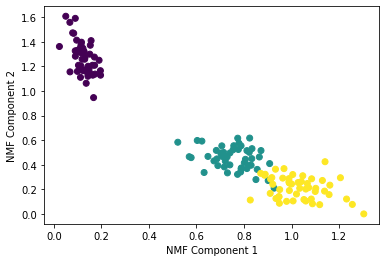

In [ ]:
iris = load_iris()
iris_ftrs = iris.data

from sklearn.decomposition import NMF
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel("NMF Component 1")
plt.ylabel("NMF Component 2")
plt.show()